# Notebook for single trial PCA
## single reach stim trials only (no laser), 50ms before lift to 300ms after behavior ends (assuming 260ms for at mouth)
## 5ms/10ms/20ms time bins
## Applying Kalman filter (Q=1e-3, no baseline firing rate)

In [1]:
from pathlib import Path
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import fastplotlib as fpl

Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.


Image(value=b'version https://git-lfs.github.com/spec/...', height='55', width='300')

Valid,Device,Type,Backend,Driver
✅,Intel(R) Arc(tm) Graphics (MTL),IntegratedGPU,Vulkan,Mesa 25.0.4
✅ (default),NVIDIA GeForce RTX 4060 Laptop GPU,DiscreteGPU,Vulkan,565.77
❗ limited,"llvmpipe (LLVM 19.1.7, 256 bits)",CPU,Vulkan,Mesa 25.0.4 (LLVM 19.1.7)
❌,Mesa Intel(R) Arc(tm) Graphics (MTL),IntegratedGPU,OpenGL,4.6 (Core Profile) Mesa 25.0.4


Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.


In [2]:
mat = loadmat("/home/clewis/wasabi/reaganbullins2/ProjectionProject/rb50/20250127/MAT_FILES/rb50_20250127_datastruct_pt2.mat")
mat = mat['data']

print(type(mat))        # <class 'numpy.ndarray'>
print(mat.dtype.names)

<class 'numpy.ndarray'>
('totTime', 'cue', 'laser', 'trial_start', 'cue_rec_time', 'cue_trial_time', 'laser_rec_time', 'laser_trial_time', 'field_size', 'pattern_xy', 'field_id', 'full_field', 'pattern_id', 'pattern_fill', 'lift_ms', 'lift', 'grab_ms', 'grab', 'mouth_ms', 'mouth', 'single', 'any', 'no_success')


In [3]:
data_struct = mat[0, 0]  # MATLAB structs are 2D arrays even if 1x1
data = {field: data_struct[field] for field in mat.dtype.names}

In [4]:
data.keys()

dict_keys(['totTime', 'cue', 'laser', 'trial_start', 'cue_rec_time', 'cue_trial_time', 'laser_rec_time', 'laser_trial_time', 'field_size', 'pattern_xy', 'field_id', 'full_field', 'pattern_id', 'pattern_fill', 'lift_ms', 'lift', 'grab_ms', 'grab', 'mouth_ms', 'mouth', 'single', 'any', 'no_success'])

# Get single-reach control trials

In [73]:
# get no laser trials
control_idxs = np.where(data["pattern_id"][:150] > 2)[0] 

In [74]:
# get blank pattern trials
#b = np.where(data["pattern_id"][:150] == 2)[0]

In [75]:
#control_idxs = np.sort(np.concatenate((a, b)))
control_idxs

array([ 17,  19,  20,  22,  23,  24,  28,  29,  30,  34,  35,  36,  40,
        43,  44,  46,  49,  50,  53,  54,  56,  60,  61,  62,  65,  66,
        67,  70,  71,  74,  77,  79,  80,  82,  83,  86,  88,  89,  91,
        94,  95,  96, 100, 101, 102, 106, 107, 108, 114, 115, 116, 118,
       119, 120, 124, 127, 128, 131, 132, 133])

### Only want to look at single reach trials

In [76]:
single_idxs = np.where(data["single"] == 1)[1]
single_idxs

array([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,  12,  14,  15,
        16,  17,  18,  19,  20,  21,  23,  24,  26,  30,  33,  36,  37,
        38,  39,  40,  41,  43,  44,  45,  46,  48,  49,  50,  51,  52,
        53,  54,  58,  60,  61,  62,  63,  67,  68,  69,  70,  71,  73,
        74,  77,  78,  81,  82,  84,  85,  88,  89,  91, 105, 107, 109,
       116, 117, 121, 122, 130, 137, 139, 145, 148])

In [77]:
control_idxs = np.intersect1d(control_idxs, single_idxs)
control_idxs

array([ 17,  19,  20,  23,  24,  30,  36,  40,  43,  44,  46,  49,  50,
        53,  54,  60,  61,  62,  67,  70,  71,  74,  77,  82,  88,  89,
        91, 107, 116])

In [78]:
control_idxs.shape

(29,)

## Get relevant time information

In [79]:
cue_times = data["cue_rec_time"][:, :150]
cue_times[:, control_idxs]

array([[ 378401.3027471 ,  412964.5048617 ,  430223.16624186,
         481960.06796941,  499231.75682054,  603021.71245162,
         706335.69338242,  775155.48003398,  826860.47389786,
         844093.36354196,  878540.9232512 ,  930339.75266686,
         947557.06598697,  999343.5287454 , 1016540.9232512 ,
        1120486.35891627, 1137781.83706221, 1155099.87727745,
        1241575.09676201, 1293329.17964694, 1310604.83338053,
        1362412.63098272, 1414270.55602757, 1500421.5047673 ,
        1604049.56103087, 1621268.29038044, 1655724.06306051,
        1932015.76512791, 2087651.09034268]])

In [80]:
lift_times = data["lift_ms"][:, :150]
lift_times[:, control_idxs]

array([[290., 200., 280., 270., 270., 300., 290., 310., 270., 320., 290.,
        250., 270., 280., 270., 290., 270., 270., 260., 320., 310., 310.,
        280., 340., 270., 300., 310., 300., 290.]])

In [81]:
mouth_times = data["mouth_ms"][:, :150]
mouth_times[:, control_idxs]

array([[520., 510., 630., 480., 520., 570., 670., 570., 510., 640., 560.,
        480., 520., 490., 590., 520., 550., 570., 520., 550., 580., 650.,
        510., 570., 480., 570., 550., 530., 500.]])

In [82]:
np.unique(data["pattern_id"][control_idxs])

array([14, 17, 20], dtype=uint8)

## Get the AP.bin file

In [83]:
from real_spike.utils import get_sample_data, get_meta
import tifffile

In [84]:
file_path = Path("/home/clewis/wasabi/reaganbullins2/ProjectionProject/rb50/20250127/rb50_20250127_g0/rb50_20250127_g0_t0.imec0.ap.bin")
meta_path = Path("/home/clewis/wasabi/reaganbullins2/ProjectionProject/rb50/20250127/rb50_20250127_g0/rb50_20250127_g0_t0.imec0.ap.meta")

In [85]:
meta_data = get_meta(meta_path)

In [86]:
ap_data = get_sample_data(file_path, meta_data)
ap_data.shape

(385, 166298223)

## Get conversion params

In [87]:
vmax = float(meta_data["imAiRangeMax"])
# get Imax
imax = float(meta_data["imMaxInt"])
# get gain
gain = float(meta_data['imroTbl'].split(sep=')')[1].split(sep=' ')[3])

In [88]:
vmax

0.6

In [89]:
imax

512.0

In [90]:
gain

500.0

## Get first trial

#### 50ms before "lift" to 300ms after behavior

In [91]:
trial_no = control_idxs[0]
trial_no

17

In [92]:
# get the lift time in ap units 
# cue + lift time (ms) / 1000 = s * 30_000 (sR) 
lift_time = int((cue_times[:, trial_no] + lift_times[:, trial_no] - 50) / 1_000 * 30_000)
lift_time

# get end of behavior = mouth (260ms) + 300ms 
end_behavior = int((cue_times[:, trial_no] + mouth_times[:, trial_no] + 260 + 300) / 1_000 * 30_000)
(lift_time, end_behavior)

(11359239, 11384439)

In [93]:
trial_one = ap_data[:150, lift_time:end_behavior]
trial_one.shape

(150, 25200)

In [94]:
data["laser_rec_time"][0, 17] / 1_000 * 30_000

11352039.082412913

## Convert to microvolts 

In [95]:
conv_data = 1e6 * trial_one / vmax / imax / gain

In [96]:
conv_data.shape

(150, 25200)

## Filter

In [97]:
from real_spike.utils import butter_filter

In [98]:
filt_data = butter_filter(conv_data, 1_000, 30_000)
filt_data.shape

(150, 25200)

## Median/MAD Threshold 

In [99]:
from real_spike.utils import get_spike_events

In [100]:
median = np.median(filt_data, axis=1)
median.shape

(150,)

In [101]:
spike_ixs, counts = get_spike_events(filt_data, median)

In [102]:
# create a range of the entire trial time
# binarize the spike times
# bin into 5ms bins (every 150 data points) 

In [103]:
a = np.zeros((filt_data.shape[0], filt_data.shape[1]))

In [104]:
for i, sc in enumerate(spike_ixs):
    a[i, sc] = 1

## Bin the spike data

In [105]:
def bin_spike_data(spikes, bin_size):
    n_channels, n_timepoints = spikes.shape
    n_bins = n_timepoints // bin_size  # drop remainder
 #   print(n_bins)
    spikes = spikes[:, :n_bins * bin_size]  # truncate to fit bins

    # Reshape and sum
    binned = spikes.reshape(n_channels, n_bins, bin_size).sum(axis=2)
    return binned

In [106]:
bin_size = 40 # 10ms * 30 points per 1ms

In [107]:
b = bin_size * 30
binned_spikes = bin_spike_data(a, bin_size=b)

In [108]:
binned_spikes.shape

(150, 21)

## Apply kalman filter

In [109]:
import numpy as np
from filterpy.kalman import KalmanFilter

def apply_kalman_filter(data, A=1, H=1, Q=1e-2, R=1, initial_state=None):
    """
    Applies 1D Kalman filter to each channel in the binned spike data.

    Args:
        data (ndarray): Shape (n_channels, n_time_bins)
        A: State transition
        H: Observation model
        Q: Process noise
        R: Measurement noise
        initial_state: Optional starting value per channel

    Returns:
        ndarray: Smoothed data of same shape
    """
    n_channels, n_time = data.shape
    smoothed = np.zeros_like(data, dtype=float)

    for ch in range(n_channels):
        kf = KalmanFilter(dim_x=1, dim_z=1)
        kf.F = np.array([[A]])     # State transition matrix
        kf.H = np.array([[H]])     # Observation matrix
        kf.Q = np.array([[Q]])     # Process noise covariance
        kf.R = np.array([[R]])     # Measurement noise covariance
        kf.x = np.array([[initial_state[ch] if initial_state else data[ch, 0]]])  # Initial state
        kf.P = np.eye(1) * 1       # Initial covariance

        for t in range(n_time):
            kf.predict()
            kf.update(np.array([[data[ch, t]]]))
            smoothed[ch, t] = kf.x[0, 0]

    return smoothed

In [110]:
#binned = np.random.poisson(0.5, (4, 100))  # fake binned data
smoothed = apply_kalman_filter(binned_spikes)


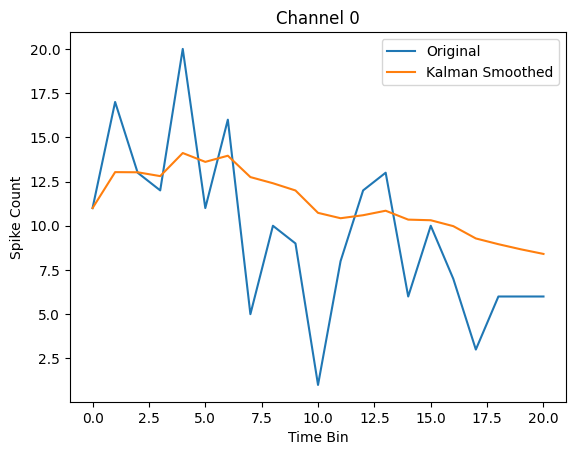

In [111]:
import matplotlib.pyplot as plt

plt.plot(binned_spikes[0], label='Original')
plt.plot(smoothed[0], label='Kalman Smoothed')
plt.legend()
plt.title('Channel 0')
plt.xlabel('Time Bin')
plt.ylabel('Spike Count')
plt.show()


In [112]:
from sklearn.decomposition import PCA

In [113]:
pca = PCA(n_components=6)

# Fit the PCA model to the data and transform the data
pca.fit(smoothed.T)
reduced_data = pca.transform(smoothed.T)

print("Explained variance ratio by each principal component:", pca.explained_variance_ratio_)

Explained variance ratio by each principal component: [0.9303065  0.04908102 0.0065953  0.00587483 0.00297171 0.001607  ]


In [114]:
reduced_data.shape

(21, 6)

In [115]:
smoothed.shape

(150, 21)

In [116]:
# lift/grab/mouth

In [117]:
# 50 ms before lift = 10 bins 
# 300 ms after mouth = 60 bins

In [118]:
# lift duration
lift = int(data["lift_ms"][0,trial_no] / bin_size) 
# grab duration
grab = int(data["grab_ms"][0,trial_no] / bin_size)
# mouth duration 
mouth = int(data["mouth_ms"][0,trial_no] / bin_size)

(lift, grab, mouth)

(7, 9, 13)

In [119]:
trial_no

17

Explained variance ratio by each principal component: [0.9303065  0.04908102 0.0065953  0.00587483 0.00297171 0.001607  ]


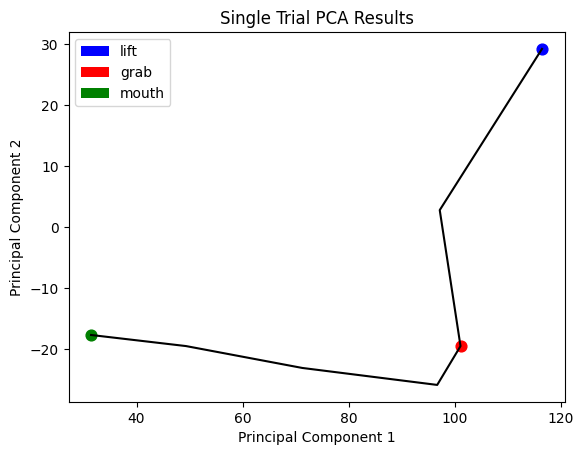

In [120]:
# Print explained variance ratio
print("Explained variance ratio by each principal component:", pca.explained_variance_ratio_)

lift_start = int(50 / bin_size)
mouth_start = lift_start + (mouth-lift)

# # Visualize the reduced data (scatter plot)
plt.plot(reduced_data[lift_start:mouth_start+1, 0], reduced_data[lift_start:mouth_start+1, 1], c="black")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Single Trial PCA Results")

plt.scatter(reduced_data[lift_start, 0], reduced_data[lift_start, 1], s=60, c="blue")
plt.scatter(reduced_data[grab - lift + lift_start, 0], reduced_data[grab-lift +lift_start, 1], s=60, c="red")
plt.scatter(reduced_data[mouth_start, 0], reduced_data[mouth_start, 1], s=60, c="green")

from matplotlib.patches import Patch

# Sample color mapping
c = {'lift': 'blue', 'grab': 'red', 'mouth': 'green'}

# Manual legend
legend_elements = [Patch(facecolor=color, label=beh) for beh, color in c.items()]
plt.legend(handles=legend_elements)
plt.show()

In [121]:
from tqdm import tqdm

In [124]:
all_data = list()

colors = list()
c = {14: "cyan", 17: "magenta", 20: "orange"}
#explained_variances = list()

# HYPERPARAMETERS TO TOGGLE
bin_size = 40
Q=1e-3

for i in tqdm(control_idxs):
    trial_no = i
    colors.append(c[data["pattern_id"][i][0]])
    # get time points in ap space
    lift_time = int((cue_times[:, trial_no] + lift_times[:, trial_no] - 50) / 1_000 * 30_000)
    
    # get end of behavior = mouth (260ms) + 300ms 
    end_behavior = int((cue_times[:, trial_no] + mouth_times[:, trial_no] + 260 + 300) / 1_000 * 30_000)
    #print(lift_time, end_behavior)

    trial = ap_data[:150, lift_time:end_behavior]

    conv_data = 1e6 * trial / vmax / imax / gain

    filt_data = butter_filter(conv_data, 1_000, 30_000)

    median = np.median(filt_data, axis=1)

    spike_ixs, counts = get_spike_events(filt_data, median)
    
    a = np.zeros((filt_data.shape[0], filt_data.shape[1]))

    for i, sc in enumerate(spike_ixs):
        a[i, sc] = 1

    b = bin_size * 30 # 30ms per bin
    binned_spikes = bin_spike_data(a, b)

    smoothed = apply_kalman_filter(binned_spikes, Q=Q)

    all_data.append(smoothed)

100%|█████████████████████████████████████████████████████████████████████████| 29/29 [00:11<00:00,  2.44it/s]


In [125]:
pca = PCA(n_components=6)

d = np.concatenate(all_data, axis=1)

    # Fit the PCA model to the data and transform the data
pca.fit(d.T)
    # reduced_data = pca.transform(smoothed.T)

    # pcas.append(reduced_data)
pca.explained_variance_ratio_

array([0.51259171, 0.08747421, 0.0490738 , 0.03442206, 0.03072377,
       0.02218496])

In [126]:
def get_trial_PCA(trial, pca):
    X = trial.T

    total_var = np.var(X, axis=0).sum()

    proj = pca.transform(X)

    pc_vars = np.var(proj[:, :3], axis=0)

    explained = pc_vars / total_var

    return explained, proj

In [127]:
from scipy.ndimage import gaussian_filter1d

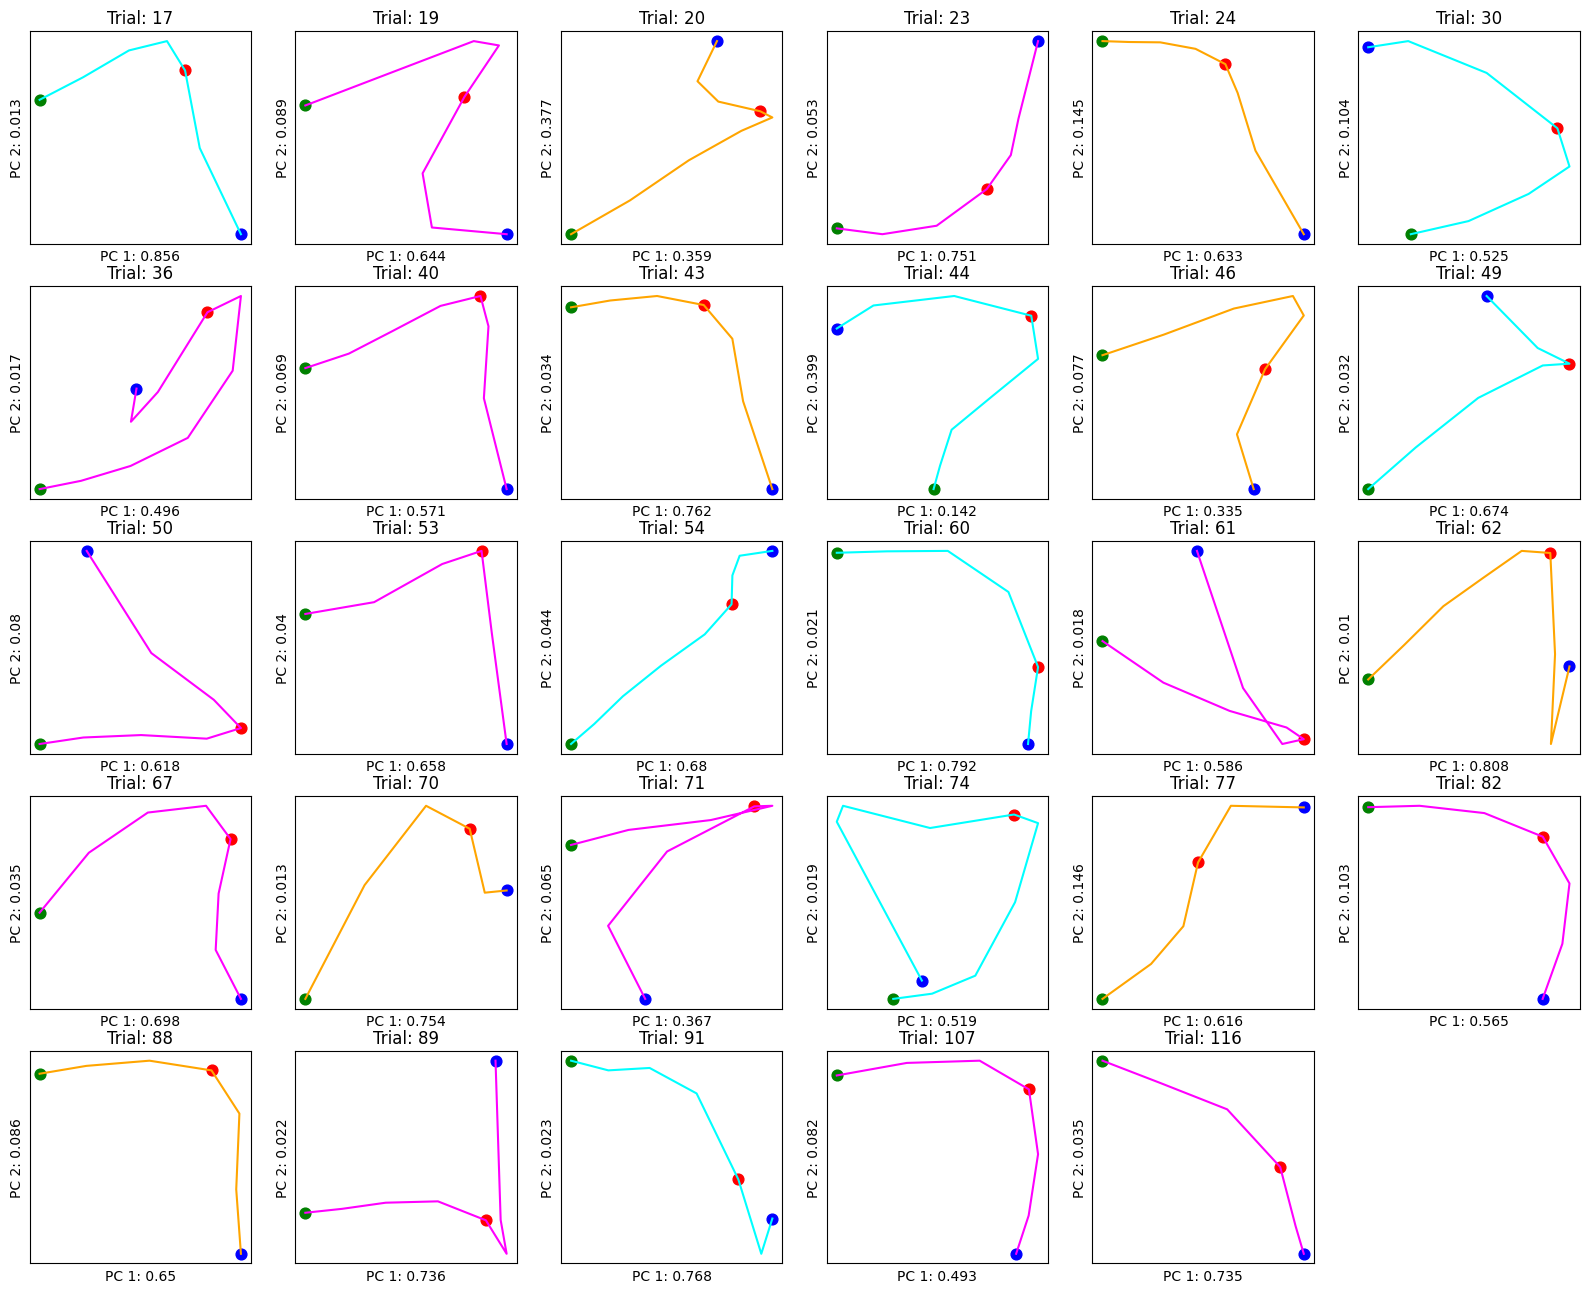

In [129]:
fig, axes = plt.subplots(5, 6, figsize=(20, 16))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, p in enumerate(all_data):

    explained_var, p = get_trial_PCA(p, pca)
    
    lift = int(data["lift_ms"][0, control_idxs[i]] / bin_size) 
    # grab duration
    grab = int(data["grab_ms"][0,control_idxs[i]] / bin_size)
    # mouth duration 
    mouth = int(data["mouth_ms"][0,control_idxs[i]] / bin_size)

    lift_start = int(50 / bin_size)
    grab_start = lift_start + (grab - lift)
    mouth_start = lift_start + (mouth-lift)

    # p = gaussian_filter1d(p, sigma=0.05)
    p = gaussian_filter1d(p, sigma=1, axis=0)

    #axes[i].scatter(p[:, 0], p[:, 1], s=1, c=colors)
    axes[i].plot(p[lift_start:mouth_start+1, 0], p[lift_start:mouth_start+1, 1], c=colors[i])
    axes[i].set_xlabel(f"PC 1: {round(explained_var[0], 3)}")
    axes[i].set_ylabel(f"PC 2: {round(explained_var[1], 3)}")
    axes[i].set_title(f"Trial: {control_idxs[i]}")
    axes[i].set_xticks([])
    axes[i].set_yticks([])


    axes[i].scatter(p[lift_start, 0], p[lift_start, 1], s=60, c="blue")
    axes[i].scatter(p[grab_start, 0], p[grab_start, 1], s=60, c="red")
    axes[i].scatter(p[mouth_start, 0], p[mouth_start, 1], s=60, c="green")

axes[-1].remove() 

#plt.savefig(f'/home/clewis/repos/realSpike/data/rb50_20250127/single_trial_PCA_control_{bin_size}ms.png')

In [ ]:
# plot all the trajectories on top of each other

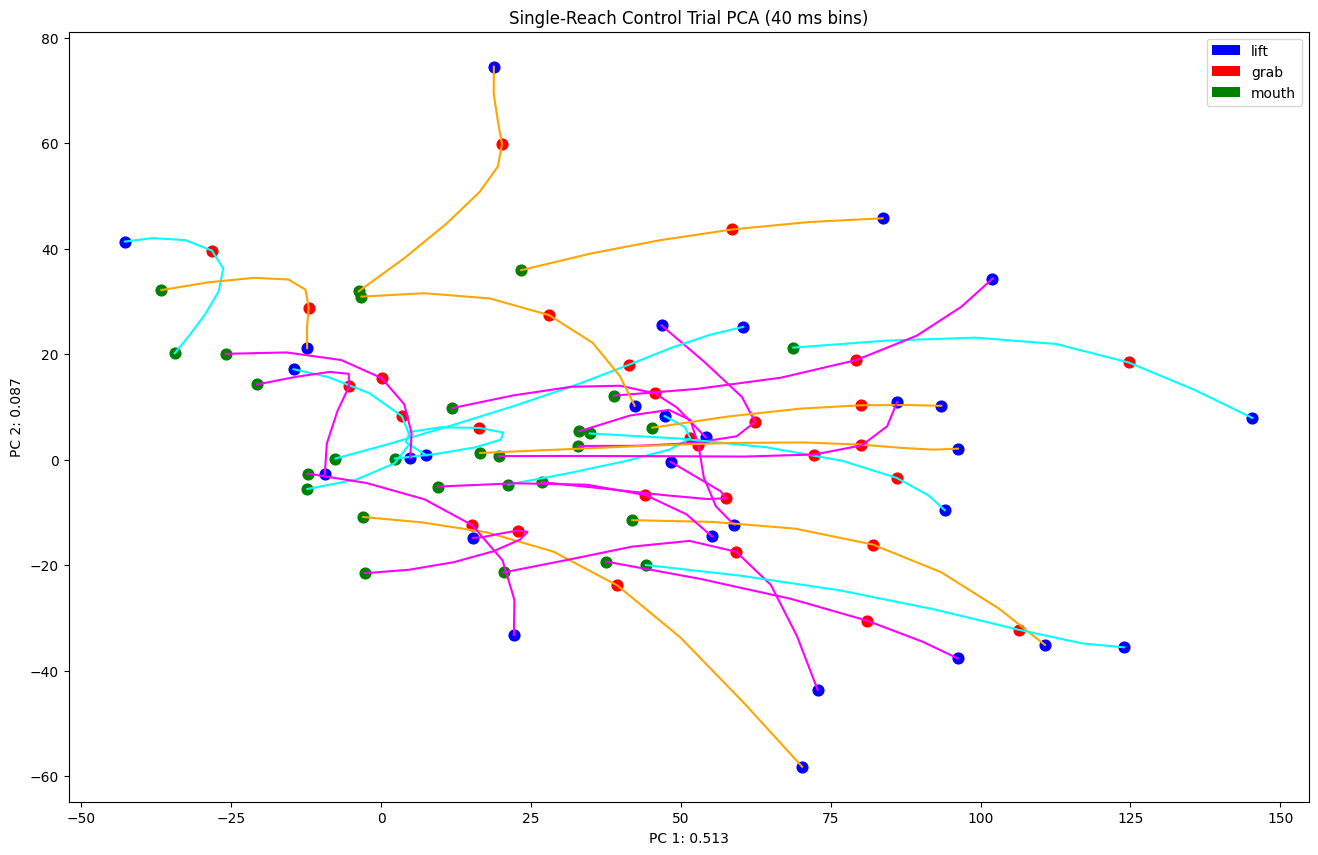

In [130]:
#plt.xticks([])
#plt.yticks([])
fig = plt.figure(figsize=(16, 10))

plt.xlabel(f"PC 1: {round(pca.explained_variance_ratio_[0], 3)}")
plt.ylabel(f"PC 2: {round(pca.explained_variance_ratio_[1], 3)}")

for i, p in enumerate(all_data):

    explained_var, p = get_trial_PCA(p, pca)

    lift = int(data["lift_ms"][0, control_idxs[i]] / bin_size) 
    # grab duration
    grab = int(data["grab_ms"][0,control_idxs[i]] / bin_size)
    # mouth duration 
    mouth = int(data["mouth_ms"][0,control_idxs[i]] / bin_size)

    lift_start = int(50 / bin_size)
    grab_start = lift_start + (grab - lift)
    mouth_start = lift_start + (mouth-lift)

    # p = gaussian_filter1d(p, sigma=0.05)

    #axes[i].scatter(p[:, 0], p[:, 1], s=1, c=colors)
    p = gaussian_filter1d(p, sigma=2, axis=0)
    plt.plot(p[lift_start:mouth_start+1, 0], p[lift_start:mouth_start+1, 1], c=colors[i])



    plt.scatter(p[lift_start, 0], p[lift_start, 1], s=60, c="blue")
    plt.scatter(p[grab_start, 0], p[grab_start, 1], s=60, c="red")
    plt.scatter(p[mouth_start, 0], p[mouth_start, 1], s=60, c="green")

# Sample color mapping
c = {'lift': 'blue', 'grab': 'red', 'mouth': 'green'}

# Manual legend
legend_elements = [Patch(facecolor=color, label=beh) for beh, color in c.items()]
plt.legend(handles=legend_elements)

plt.title(f"Single-Reach Control Trial PCA ({bin_size} ms bins)")

#plt.savefig(f'/home/clewis/repos/realSpike/data/rb50_20250127/single_trial_PCA_control_{bin_size}ms_all.png')

plt.show()

